In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import shap
import lime
import lime.lime_tabular

# -------------------------------
# Load the saved XGBoost model
# -------------------------------
model = XGBRegressor(objective='reg:squarederror')
model.load_model("./trained_models/xgboost_model.json")
print("XGBoost model loaded successfully.")

XGBoost model loaded successfully.


In [6]:
df = pd.read_csv("./dataset/cleaned_train.csv")
y = df['SalePrice'] # np.log1p(df['SalePrice'])
X = df.drop(["SalePrice"], axis=1)

## SHAP Explanation (Global & Local)

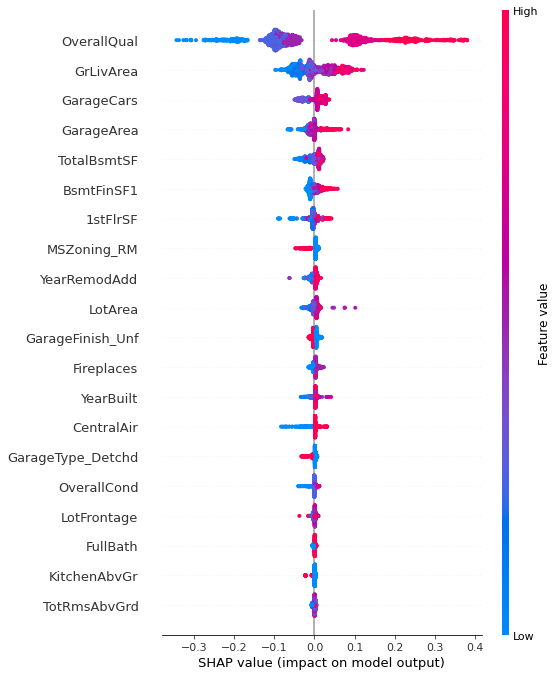

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Global explanation: Summary plot shows overall feature importance and effect.
shap.summary_plot(shap_values, X)